In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [94]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [95]:
encoder = LabelEncoder()
Class_ec = encoder.fit_transform(df['Class'])

In [96]:
df["Class"] = Class_ec

In [97]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,4
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,4
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,4
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,4
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,49022,880.221,363.493790,172.406675,2.108351,0.880361,49606,249.833442,0.599834,0.988227,0.795092,0.687311,0.007415,0.001021,0.472397,0.995979,3
5995,49035,872.744,344.807975,184.599390,1.867872,0.844618,50287,249.866567,0.692409,0.975103,0.808988,0.724654,0.007032,0.001196,0.525124,0.980864,3
5996,49099,888.027,367.923198,171.159772,2.149589,0.885203,49674,250.029575,0.581852,0.988425,0.782402,0.679570,0.007493,0.000986,0.461815,0.992713,3
5997,49102,869.585,351.238493,179.343335,1.958470,0.859817,49660,250.037213,0.619693,0.988764,0.815990,0.711873,0.007153,0.001133,0.506763,0.992480,3


In [98]:
x = df.drop(['Class','Extent','AspectRation','MajorAxisLength','MinorAxisLength','Compactness'], axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [99]:
df1 = pd.DataFrame(data = scaled,columns = ["Area","Perimeter","Eccentricity","ConvexArae","EquivDiameter","Solididty","roundness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])

In [100]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)
df2

array([[-4.37688642, -0.30497832],
       [-4.5623716 , -0.59210673],
       [-4.20027741, -0.29598191],
       ...,
       [ 0.48552259,  2.86298017],
       [ 0.17531156,  2.31689657],
       [ 0.74993887,  3.25631804]])

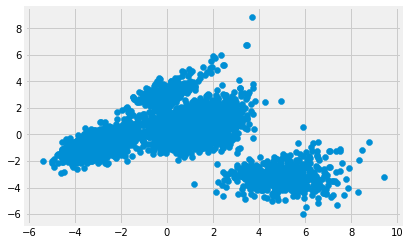

In [101]:
plt.scatter(df2[:, 0], df2[:, 1])

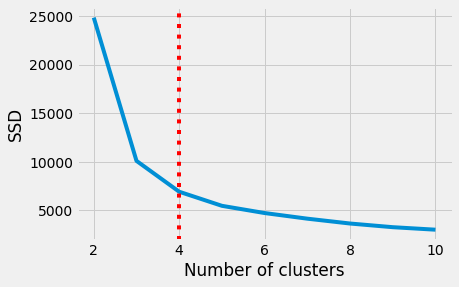

In [105]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(4, ls='dotted',color='red') # elbow formed as 6
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

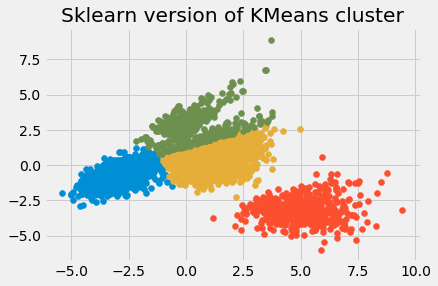

In [106]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of KMeans cluster")
    plt.style.use('fivethirtyeight')

#### Performance is average because 3 classes are very near.

In [107]:
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [108]:
dictlist[0]

[0, array([   0,    1,    2, ..., 5523, 5616, 5686], dtype=int32)]

In [109]:
df3 = x.values

In [111]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1],columns = ["Area","Perimeter","Eccentricity","ConvexArae","EquivDiameter","Solididty","roundness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1],columns = ["Area","Perimeter","Eccentricity","ConvexArae","EquivDiameter","Solididty","roundness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ["Area","Perimeter","Eccentricity","ConvexArae","EquivDiameter","Solididty","roundness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])

accessed_mapping = map(df3.__getitem__, dictlist[3])
cl4 = list(accessed_mapping)
cluster_4 = pd.DataFrame(cl4[1],columns = ["Area","Perimeter","Eccentricity","ConvexArae","EquivDiameter","Solididty","roundness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"])



In [112]:
print("*" * 75)
print("The Average Area in cluster 1 is:")
print(cluster_1["Area"].mean())
print("*" * 75)
print("The Average Eccenricity in cluster 1 are:")
print(cluster_1["Eccentricity"].mean())
print("*" * 75)
print("The Average roundness category 1 is:")
print(cluster_1["roundness"].mean())
print("*" * 75)

***************************************************************************
The Average Area in cluster 1 is:
39935.76331360947
***************************************************************************
The Average Eccenricity in cluster 1 are:
0.5840783133314099
***************************************************************************
The Average roundness category 1 is:
0.9456075191505201
***************************************************************************


In [113]:
## Final Report of Cluster 2

print("*" * 75)
print("The Average Area in cluster 2 is:")
print(cluster_2["Area"].mean())
print("*" * 75)
print("The Average Eccenricity in cluster 2 are:")
print(cluster_2["Eccentricity"].mean())
print("*" * 75)
print("The Average roundness category 2 is:")
print(cluster_2["roundness"].mean())
print("*" * 75)

***************************************************************************
The Average Area in cluster 2 is:
173599.226487524
***************************************************************************
The Average Eccenricity in cluster 2 are:
0.7706597177043218
***************************************************************************
The Average roundness category 2 is:
0.8644000259861991
***************************************************************************


In [114]:
## Final Report of Cluster 3

print("*" * 75)
print("The Average Area in cluster 3 is:")
print(cluster_3["Area"].mean())
print("*" * 75)
print("The Average Eccenricity in cluster 3 are:")
print(cluster_3["Eccentricity"].mean())
print("*" * 75)
print("The Average roundness category 3 is:")
print(cluster_3["roundness"].mean())
print("*" * 75)

***************************************************************************
The Average Area in cluster 3 is:
73893.10075295805
***************************************************************************
The Average Eccenricity in cluster 3 are:
0.7883451661050767
***************************************************************************
The Average roundness category 3 is:
0.8269803470306286
***************************************************************************


In [115]:
## Final Report of Cluster 4
print("*" * 75)
print("The Average Area in cluster 4 is:")
print(cluster_4["Area"].mean())
print("*" * 75)
print("The Average Eccenricity in cluster 4 are:")
print(cluster_4["Eccentricity"].mean())
print("*" * 75)
print("The Average roundness category 4 is:")
print(cluster_4["roundness"].mean())
print("*" * 75)

***************************************************************************
The Average Area in cluster 4 is:
47477.833585476554
***************************************************************************
The Average Eccenricity in cluster 4 are:
0.8437730349607282
***************************************************************************
The Average roundness category 4 is:
0.7982473972658459
***************************************************************************


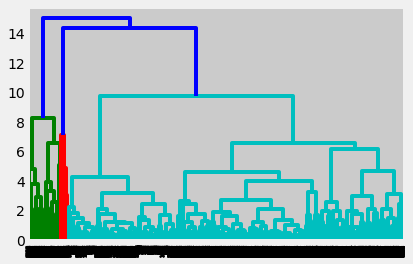

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage
#import plotly.figure_factory as ff
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


#### From dendrogram the clusters are 8 

In [ ]:
from sklearn.cluster import AffinityPropagation
d = [0.5,0.6,0.7,0.8,0.9]
for i in range(len(d)):
    v = d[i]
    print(v)
    model = AffinityPropagation(damping=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of Affinity Propagation")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Affinity Prpagation doesnot work it is not suitable for large dataset.

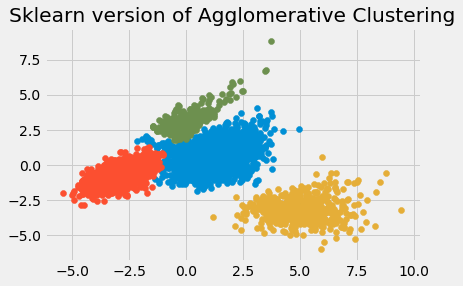

In [118]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Agglomerative Clustering")
    plt.style.use('fivethirtyeight')

#### It doesnot perform very well it merges the three classes.

0.17


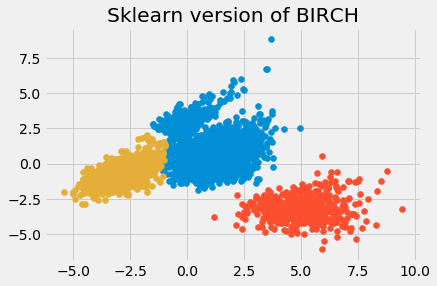

0.33


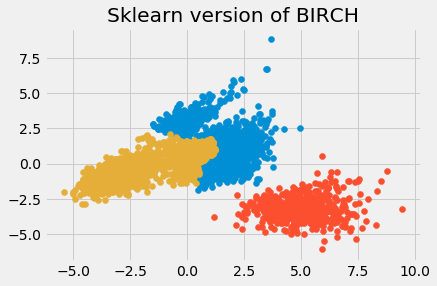

0.1


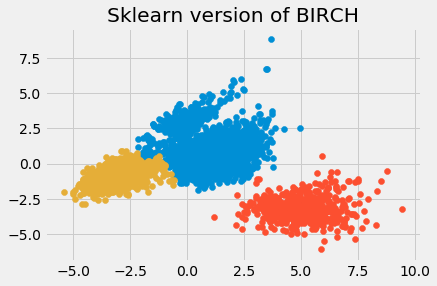

0.5


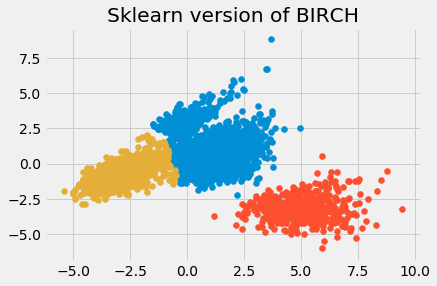

0.8


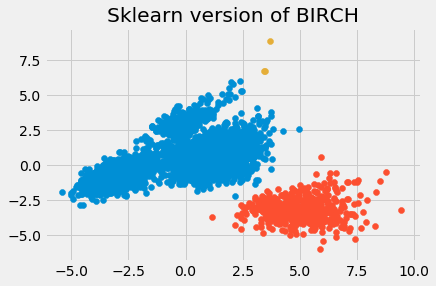

1


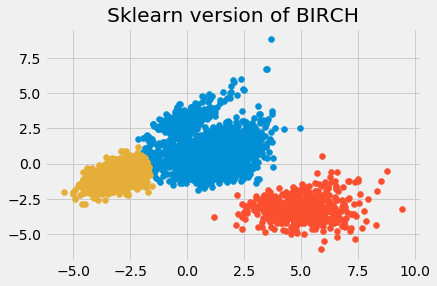

In [119]:
from sklearn.cluster import Birch
b = [0.17,0.33,0.1,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = Birch(threshold=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of BIRCH")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Birch performs well on 0.5 threshold value it clearly classify the 3 classes. Create 3 classes on 0.8 threshold value but class treated as outliers. 

0.17


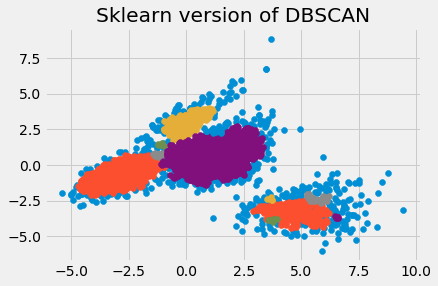

0.1


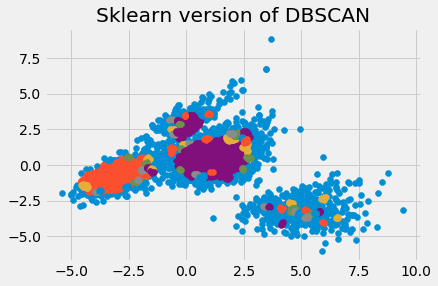

0.12


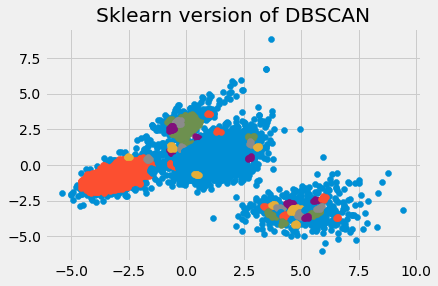

0.25


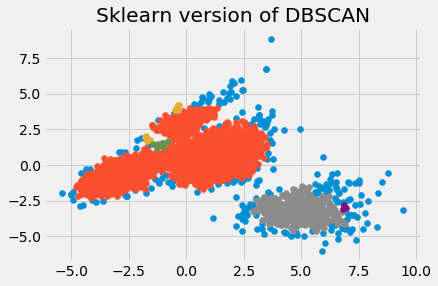

0.33


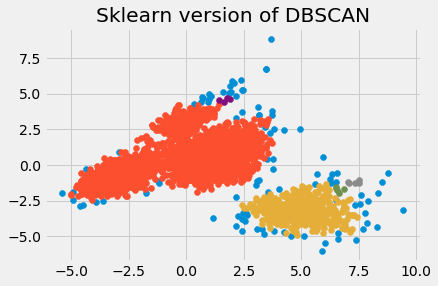

0.5


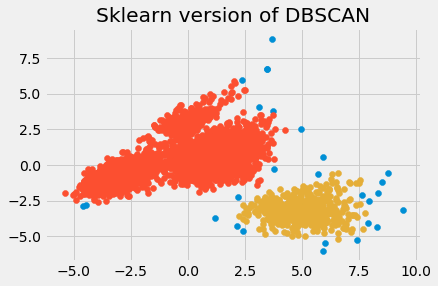

0.8


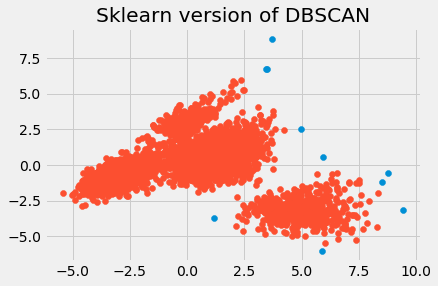

1


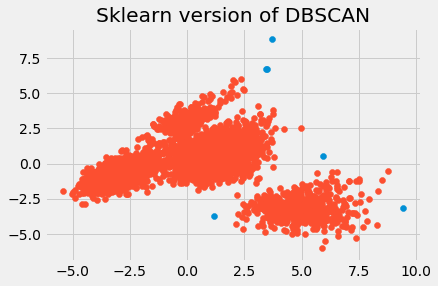

In [120]:
from sklearn.cluster import DBSCAN
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = DBSCAN(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of DBSCAN")
        plt.style.use('fivethirtyeight')
    plt.show()

#### DBSCAN performs very worst in this dataset. It created 1 class on 0.8 and 1 eps value.

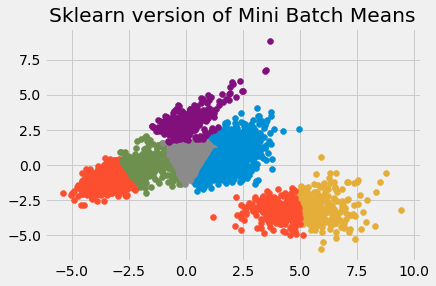

In [121]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans()
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means")
    plt.style.use('fivethirtyeight')

#### It classify correctly 7 classes as originally the data contains 7 classes

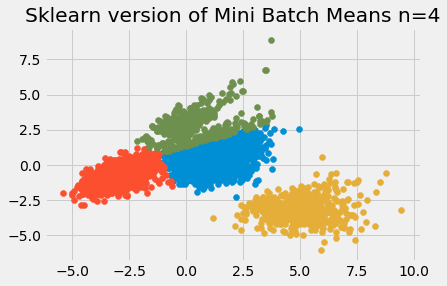

In [122]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=4)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means n=4")
    plt.style.use('fivethirtyeight')

0.17


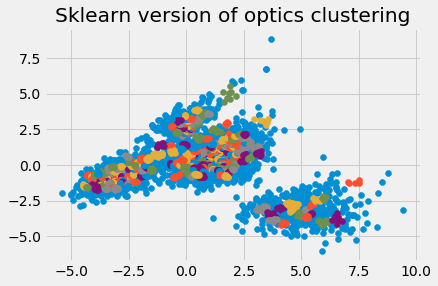

0.1


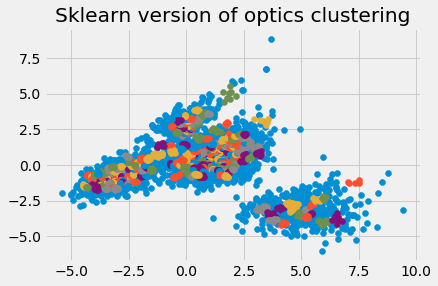

0.12


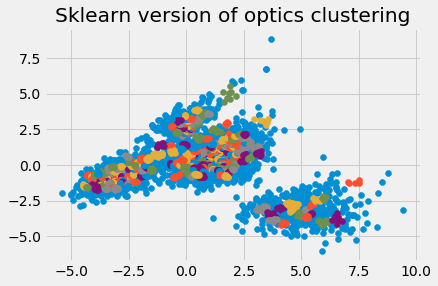

0.25


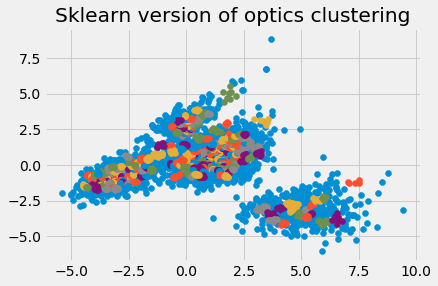

0.33


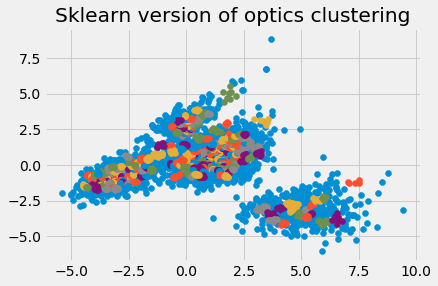

0.5


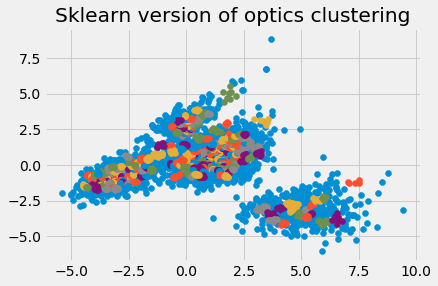

0.8


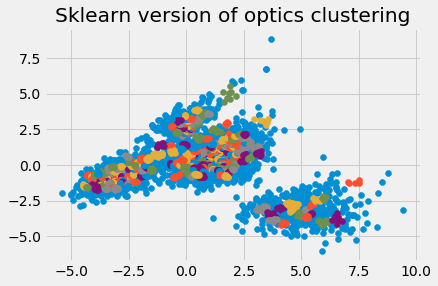

1


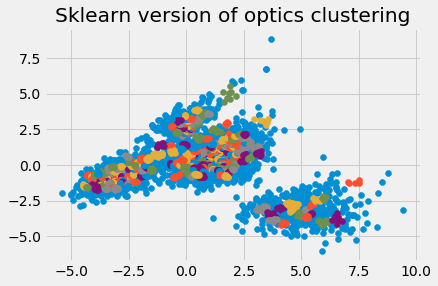

In [123]:
from sklearn.cluster import OPTICS
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = OPTICS(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of optics clustering")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Optics doesnot perform good for this dataset for any eps value.

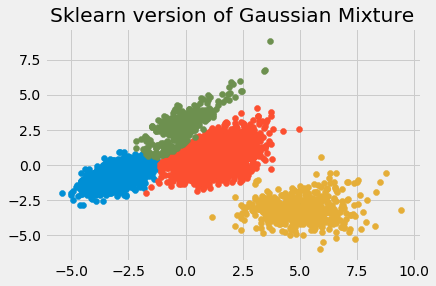

In [127]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Gaussian Mixture")
    plt.style.use('fivethirtyeight')

#### It performs well on this dataset.

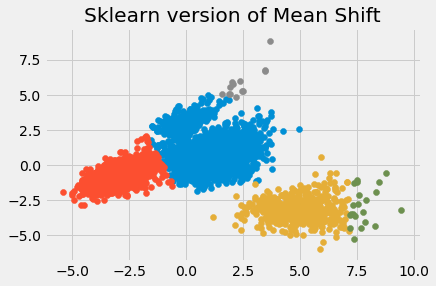

In [128]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df2, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)
model.fit(df2)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Mean Shift")
    plt.style.use('fivethirtyeight')

#### It performs average in this dataset. It creates 5 clusters